# **Lab 8: Regression and Inference (25 points)**

#### **Dylan Watson**


---
**Instructions**: Complete the lab below.
- <font color=red>Tasks</font> indicated in red must be completed to receive credit
- Include all code for your work
- Include markdown cells with written answers explaining your work when prompted
- **NOTE: Your completed lab must be submitted to Canvas as a .ipynb file by the end of the lab session**
---




<br>




####<font color=red>Organized</font> (1 points)
* Answers should be organized in the following format for organization and readability

<br>

```
# 1.
This will be the code block to answer the first part of a task
```

1. This will be the text answer/explanation (if prompted) for the first task

```
# 2.
This will be the code block to answer the second part of a task in a separate code cell
```

2. This will be the text answer/explanation (if prompted) for the second task

<br>

Continue this format for the remaining subtasks


<br>

---

<br>






####<font color=red>Task 0</font>  (1 points)

Load the copd dataset using the following script.

Note the data in this lab is processed differently than required for the project, however, tasks closely parallel what is required for the project.


In [1]:
# load copd dataset
copd <- read.csv('https://raw.githubusercontent.com/khasenst/datasets_teaching/main/copd_data_project.csv', header = TRUE)

# removes all missing -1 values (ignore)
copd <- copd[-unique(unlist(lapply(copd, function(x) {which(x == -1)}))),]
copd <- na.omit(copd)[, -ncol(copd)]

head(copd)

,sid,visit_year,visit_date,visit_age,gender,race,height_cm,weight_kg,sysBP,diasBP,⋯,smoking_status,total_lung_capacity,pct_emphysema,functional_residual_capacity,pct_gastrapping,insp_meanatt,exp_meanatt,FEV1_FVC_ratio,FEV1,FVC
,<chr>,<int>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,⋯,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,10005Q,2008,1/15/2008,54.5,Female,White,159.9,73.0,130,80,⋯,Current smoker,5.6636,0.926851,2.4766,6.80077,-830.343,-650.526,0.77,2.921,3.805
3,10010J,2008,1/15/2008,65.9,Female,White,162.1,62.8,96,63,⋯,Current smoker,5.1960,1.683760,3.8993,41.34930,-833.429,-789.595,0.53,1.008,1.909
5,10017X,2008,6/15/2008,67.5,Male,White,179.1,83.0,106,72,⋯,Former smoker,7.8935,36.262400,4.1043,46.17690,-887.947,-792.397,0.57,2.748,4.827
10,10047G,2008,4/15/2008,81.0,Female,White,165.1,74.0,116,78,⋯,Former smoker,5.3517,5.883040,3.3236,30.46070,-853.408,-763.868,0.61,1.411,2.319
14,10056H,2008,2/15/2008,48.7,Female,White,153.7,86.2,100,53,⋯,Former smoker,4.8654,11.383200,4.0606,47.88110,-836.281,-797.471,0.29,0.374,1.281
16,10060Y,2008,5/15/2008,72.8,Male,White,177.0,89.6,147,71,⋯,Former smoker,7.3304,19.262300,5.3342,53.47470,-867.254,-821.256,0.29,0.706,2.424


<br>

---

<br>






####<font color=red>Task 1</font>  (10 points)

1. Create a scatterplot using `pct_gastrapping` on the y-axis and `FEV1` on the x-axis. Describe what you observe in complete sentences.
  * `FEV1` is volume (liters) of air a patient is able to exhale in one second (higher values typically suggest healthier lungs)
  * `pct_gastrapping` is the percentage of lung STILL filled with air after exhaling (this is bad). Higher values suggest airway dysfunction.

2. Is the relationship between `pct_gastrapping` and `FEV1` linear or quadratic? Explain in complete sentences.

3. Fit a linear regression model using `pct_gastrapping` as your response (y-variable). Show the summary of the regression using `summary()`

4. What is the slope of the regression line? Explain what this means in the context of gas trapping and FEV1 in complete sentences.

5. Is the slope significantly different from zero? Explain why or why not in complete sentences. Also, explain what significance means in the context of the copd application.


`geom_smooth()` using formula = 'y ~ x'



Call:
lm(formula = FEV1 ~ pct_gastrapping, data = copd)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.8304 -0.5273 -0.1041  0.4700  2.8118 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      2.7981218  0.0208074   134.5   <2e-16 ***
pct_gastrapping -0.0241159  0.0007855   -30.7   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.7314 on 2759 degrees of freedom
Multiple R-squared:  0.2546,	Adjusted R-squared:  0.2544 
F-statistic: 942.6 on 1 and 2759 DF,  p-value: < 2.2e-16


,2.5 %,97.5 %
(Intercept),2.75732213,2.83892151
pct_gastrapping,-0.02565615,-0.02257571


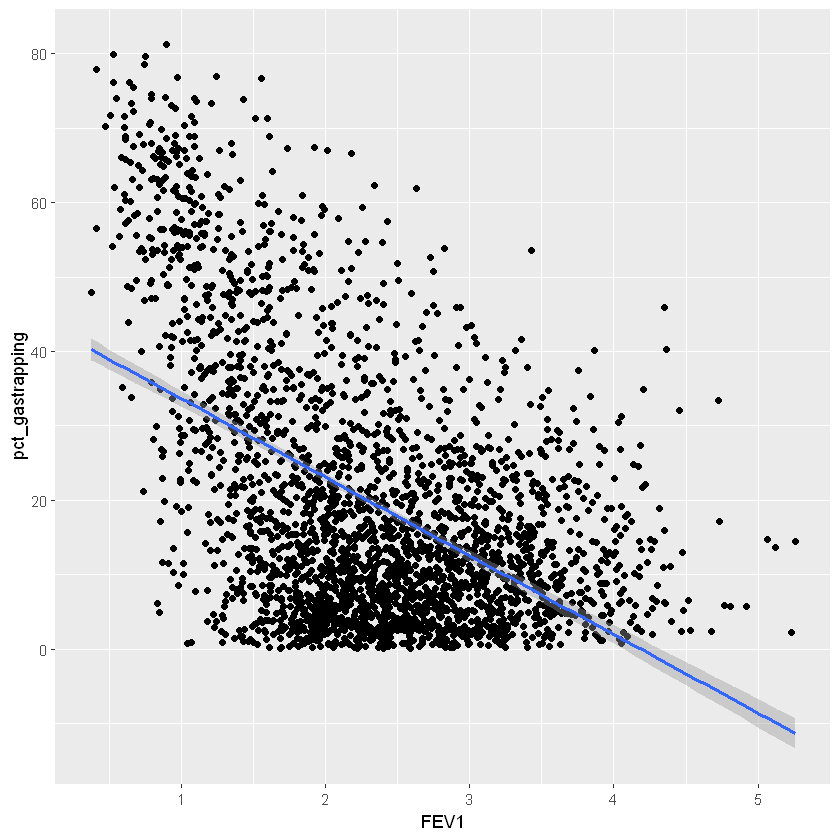

In [2]:
library(ggplot2)
# 1
ggplot(data = copd, mapping = aes(x = FEV1, y = pct_gastrapping) ) +
    geom_point() +
    geom_smooth(method = "lm")

# 3
fit = lm(FEV1 ~ pct_gastrapping, data = copd)
summary(fit)
# 5
confint(fit)

### 2
I would estimate that the relationship here between FEV1 and pct_gastrapping could be considered linear although with a lower R^2 value. As X increases, the range in response variable Y increase. In other words, the Y values spread out more as X increases in a cone shape. This implies that it may be appropriate to apply some form of transformation to either the explanatory or response variable to better fit a linear regression. 
### 4
The slope of the linear reg. is -0.024. This means that for every unit increase in FEV1 volume, there is a 0.024 decrease in the response var pct_gastrapping. A slight negative correlation.
(Note the geom_smooth reg in the plot is not the same as the one manually creates with the lm() func.)
### 5
Using conf int at the 0.05 alpha level of significance, we get an interval for the slope value of (-0.023, -0.026) which does not contain the value zero. While the values are virtually zero in the practical sense, we have enough evidence to suggest that the slope is different from zero is statistically significant at the 0.05 level.

<br>

---

<br>






####<font color=red>Task 2</font>  (8 points)

1. Create a boxplot of `pct_gastrapping` vs `emphysema`. Describe what you observe in complete sentences
  * `emphysema` is the clinician determined emphysema diagnosis and has three categories (Yes, No, unknown)

2. Fit a linear regression model using `pct_gastrapping` as your response (y-variable) and `emphysema` as your x-variable. Show the summary of the regression using `summary()`.
  * `emphysemaunknown` refers to the average difference in percent gas trapping between `unknown` and `No`
  * `emphysemaYes` refers to the average difference in percent gas trapping between `Yes` and `No`

3. Based on Task 2.2, what is the average difference in percent gas trapping between patients with emphysema and without emphysema? Answer in a complete sentence.

4. Is percent gas trapping among patients with emphysema significantly greater or less than the percent gas trapping among patients without emphysema? Explain your answer in the context of the copd data.


Call:
lm(formula = pct_gastrapping ~ emphysema, data = copd)

Residuals:
    Min      1Q  Median      3Q     Max 
-36.226 -10.481  -3.536   8.175  66.632 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       14.6368     0.3429  42.688   <2e-16 ***
emphysemaunknown   9.7580     1.1720   8.326   <2e-16 ***
emphysemaYes      21.8871     0.7395  29.599   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 15.41 on 2758 degrees of freedom
Multiple R-squared:  0.245,	Adjusted R-squared:  0.2445 
F-statistic: 447.5 on 2 and 2758 DF,  p-value: < 2.2e-16


,2.5 %,97.5 %
(Intercept),13.964471,15.30913
emphysemaunknown,7.460013,12.05602
emphysemaYes,20.437178,23.33709


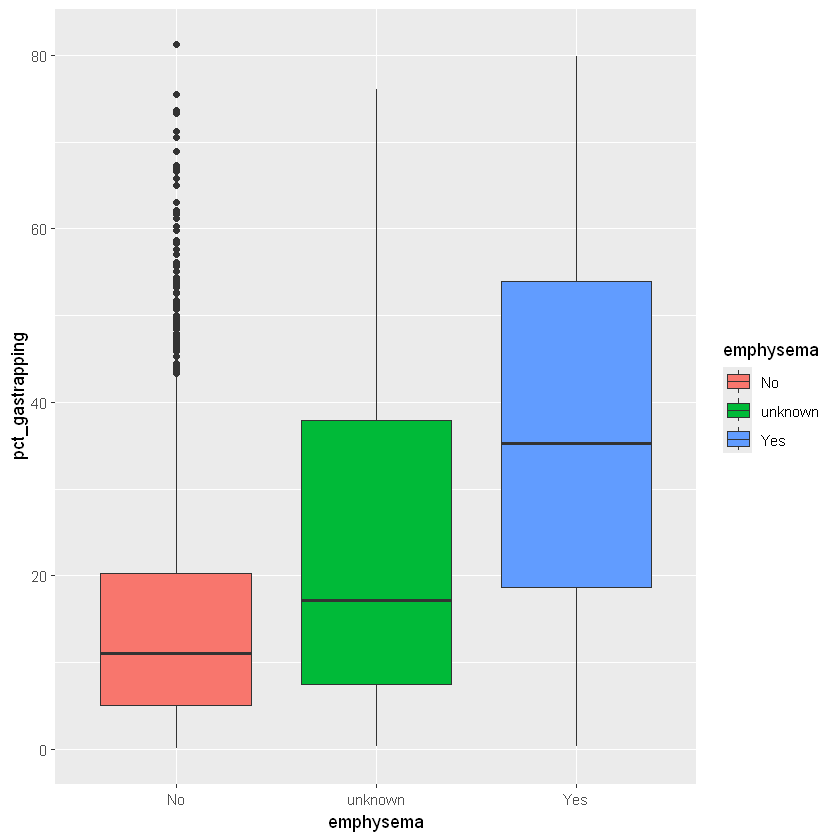

In [3]:
# 1
ggplot(data = copd, mapping = aes(x = emphysema, y = pct_gastrapping, fill = emphysema) ) +
       geom_boxplot()
# 2
fit = lm(pct_gastrapping ~ emphysema, data = copd)
summary(fit)
confint(fit)

### 3 
The average difference in pct_gastrapping between those with and without emphysema is 21.89 percent. 
### 4
Yes, the average difference in pct_gastrapping between those with and without emphesema is statistically significantly different. This can be seen both in the confidence interval as well as the p value at the 0.05 alpha level. The confidence interval is (20.44, 23.34) which does not contain zero and the p value equals 2.2*10^-16 which is less than 0.05. 

<br>

---

<br>






####<font color=red>Task 3</font>  (5 points)

1. Fit regressions with multiple predictors (independent variables) using `pct_gastrapping` as the response (dependent variable)

2. Predictor variables can be
  * linear, quadratic, cubic, etc.
  * `log()` transformed (e.g., log(pct_emphysema))
  * categorical (these will appear different in the summary)

3. Summarize each regression you fit and find the regression that maximizes adjusted $R^2$.
  * Adjusted $R^2$ is a measure of the "goodness of fit"
  * A higher adjusted $R^2$ can be considered a better fit
  * Try to maximize this value (i.e. close to 1)
  * We will compare values

4. Based on your "best" regression fit, attempt to interpret the slope parameters
  * estimates, p-values, and confidence intervals (use `confint()`)

In [4]:
colnames(copd)

[1] "sid"                          "visit_year"                  
 [3] "visit_date"                   "visit_age"                   
 [5] "gender"                       "race"                        
 [7] "height_cm"                    "weight_kg"                   
 [9] "sysBP"                        "diasBP"                      
[11] "hr"                           "O2_hours_day"                
[13] "bmi"                          "asthma"                      
[15] "hay_fever"                    "bronchitis_attack"           
[17] "pneumonia"                    "chronic_bronchitis"          
[19] "emphysema"                    "copd"                        
[21] "sleep_apnea"                  "SmokStartAge"                
[23] "CigPerDaySmokAvg"             "Duration_Smoking"            
[25] "smoking_status"               "total_lung_capacity"         
[27] "pct_emphysema"                "functional_residual_capacity"
[29] "pct_gastrapping"              "insp_meanatt"                
[31] "exp_meanatt"                  "FEV1_FVC_ratio"              
[33] "FEV1"                         "FVC"

In [5]:
fit = lm(pct_gastrapping ~ smoking_status + gender + total_lung_capacity + pct_emphysema + functional_residual_capacity + insp_meanatt + exp_meanatt + FEV1_FVC_ratio + FEV1 + FVC, data = copd)
summary(fit)


Call:
lm(formula = pct_gastrapping ~ smoking_status + gender + total_lung_capacity + 
    pct_emphysema + functional_residual_capacity + insp_meanatt + 
    exp_meanatt + FEV1_FVC_ratio + FEV1 + FVC, data = copd)

Residuals:
     Min       1Q   Median       3Q      Max 
-24.1265  -3.1580  -0.2144   2.8817  24.4135 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  -88.681096   4.595588 -19.297  < 2e-16 ***
smoking_statusFormer smoker    1.436950   0.200574   7.164 1.00e-12 ***
genderMale                     1.174836   0.258132   4.551 5.56e-06 ***
total_lung_capacity           -4.792656   0.252407 -18.988  < 2e-16 ***
pct_emphysema                  0.738745   0.017342  42.598  < 2e-16 ***
functional_residual_capacity   8.708946   0.354159  24.591  < 2e-16 ***
insp_meanatt                  -0.081461   0.007565 -10.769  < 2e-16 ***
exp_meanatt                   -0.067002   0.004270 -15.691  < 2e-16 ***
FEV1_FVC_ratio     

I created a multiple linear regression which uses 10 independent explanatory variables to predict the response variable pct_gastrapping. The variables included smoking_status, gender, total_lung_capacity, pct_emphysema, functional_residual_capacity, insp_meanatt, exp_meanatt, FEV1_FVC_ratio, FEV1, and FVC. The model ended up which a multiple R-squared of 0.9267 and an adjusted R-squared of 0.9265 which imply a strong linear correlation. Given the slopes of the variables, those which were negatively correlated with pct_gastrapping were total_lung_capacity, insp_meanatt, exp_meanatt, FEV1_FVC_ratio, and FVC. Those which were positively correlated were smoking_status, gender, pct_emphysema, functional_residual_capaicity, and FEV1. There are too many variables to type out exactly what each slope implies here, but generically, each unit increase in the explanatory variables results in a change in the response variable which is equal to the slope.